## ЙОУ!
## Сегодня речь пойдёт о найстройке гиперпараметров

### Наш небольшой планчик:
- У нас будет 3 вебинара
- После 2го вебинара (это тот, что перед третим и через один после первого) будет домашняя работу, которую буду проверять лично я
- По результатам домашки будем отчислять с курсов (шутка, конечно же нет)

### Теперь подробно про вебинары

#### 1 - Вводный вебинар, он покроет базовые темы о гиперпараметрах (1 час, но какой!):
- начнём с того что такое гиперпараметр?
- продолжим деревьями решений и случайным лесом
- закончим градиентным спуском
- разберём 2 задачи из жизни

#### 2 - Самая жара, здесь разберём основные подходы к подбору оптимальных гиперпараметров (1,5 часа):
- "Кривых обучения" - дальше он нам пригодится в deep learning-е
- как делать оптимизацию по сетке?
- как мы проводим оценку моделей при фиксе гиперпараметров с помощью кросс-валидации?
- что такое логарифмическая сетка, и как её использовать?
- что выбрать: GridSearchCV или RandomizeSearchCV
- какие интервалы стоит выбирать, чтобы не ждать примерно вечность?
- распараллеливание подбора

-------------------- Примерно тут домашка

-------------------- Или тут

#### 3 - Тематический: научим машину самостоятельно искать оптимум, а также поговорим про оптимизацию в общем и целом (1,5 часа):
- можем ли мы заставить компьютер искать гиперпараметры (спойлер - да)
- сравним результаты GridSearchCV и /*метод не назван*/
- усложним задачу - будем использовать /*метод не назван*/ для поиска оптимумов у функций
- мы все забыли про один гиперпараметр в классификации, и это...

### Фигура первая: гиперпараметрическая

<img src = 'https://media.istockphoto.com/vectors/saucepan-with-vegetable-soup-vector-id480618397'>

## Фигура вторая: деревянная

<img src='https://habrastorage.org/files/dae/a88/2b0/daea882b0a8e4ef4b23325c88f0353a1.png'>

Задача состоит в том, чтобы с помощью случайного леса на основе метеорологических данных предсказать, будет ли дождь на следующий день. Данные собраны в разных регионах Австралии за 2013-2017 годы.

In [1]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, confusion_matrix
import seaborn as sns

In [2]:
weather = pd.read_csv('/Users/kirillsokolov/Desktop/MY_DATA/karpov.courses/Karpov.Courses/randomforest/AUS_train_dataset.csv')

In [3]:
weather.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainTomorrow
0,12.3,25.7,10.8,9.8,12.6,22.0,6.0,11.0,38.0,34.0,1018.4,1014.5,1.0,1.0,21.0,24.4,0
1,11.5,21.5,0.0,NaN,NaN,41.0,15.0,19.0,71.0,56.0,1018.5,1017.0,NaN,NaN,16.0,18.4,0
2,1.6,9.0,0.8,NaN,NaN,31.0,17.0,20.0,100.0,100.0,1024.4,1024.9,7.0,7.0,5.0,8.3,0
3,7.6,14.2,4.6,NaN,NaN,37.0,20.0,20.0,85.0,68.0,1017.9,1017.9,8.0,8.0,8.7,12.8,0
4,15.4,24.7,0.0,NaN,NaN,37.0,15.0,19.0,60.0,45.0,1010.3,1009.6,NaN,NaN,21.6,23.8,0


In [4]:
medians_dict = {}
for col in weather.columns.drop('RainTomorrow'):
    medians_dict[col] = weather[col].median()
    
for col in weather.columns.drop('RainTomorrow'):
    weather[col] = weather[col].fillna(medians_dict[col])

In [7]:
y_train = weather.RainTomorrow
X_train = weather.drop('RainTomorrow', 1)

/var/folders/1d/ns2_mhcx2599g7zqsmbp6x0m0000gn/T/ipykernel_88373/2434043895.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  X_train = weather.drop('RainTomorrow', 1)


In [8]:
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [9]:
ran_for = RandomForestClassifier(
    n_estimators=100,
    max_depth=25,
    max_features=3,
    class_weight='balanced'
)

In [10]:
%%time
ran_for.fit(X_train, y_train)

CPU times: user 4.78 s, sys: 58.6 ms, total: 4.84 s
Wall time: 4.85 s


RandomForestClassifier(class_weight='balanced', max_depth=25, max_features=3)

In [11]:
y_pred = ran_for.predict(X_test)

In [12]:
print('precision:  ', precision_score(y_test, y_pred))
print('recall:  ', recall_score(y_test, y_pred))

precision:   0.7386609071274298
recall:   0.4570155902004454


In [13]:
confusion_matrix(y_test, y_pred)

array([[7944,  363],
       [1219, 1026]])

## Фигура третья: градиентная

#### Пример 1

<img src='https://habrastorage.org/web/0e6/7dd/614/0e67dd614076499e91c8c4238457ae4d.png'>

#### Пример 2

<img src='https://habrastorage.org/web/7b4/ab0/5fa/7b4ab05fa0a543bfad94950e47f91568.png'>

#### Суть

<img src='http://scott.fortmann-roe.com/docs/docs/BiasVariance/biasvariance.png'>

<img src='https://nvsyashwanth.github.io/machinelearningmaster/assets/images/bias_variance.jpg'>

Мы предскажем стоимость подержанного авто по его описанию. Но теперь подойдём к задаче, вооружившись более сильным методом - градиентным бустингом. Снова предположим, что вы работаете в компании, которая занимается размещением объявлений. Но в этот раз вы собрали выборку объявлений, размещённых в США, и должны предсказать цену в долларах. 

В качестве метрики качества у нас будет $RMSE$, и нам необходимо побороть baseline с $RMSE = 8500$

In [23]:
import pandas as pd
import seaborn as sns
from catboost import CatBoostRegressor
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as mse
from matplotlib import pyplot as plt
from sklearn.metrics import r2_score

class MultiColumnLabelEncoder:
    def __init__(self,columns = None):
        self.columns = columns # array of column names to encode

    def fit(self, X, y=None):
        return self # not relevant here

    def transform(self,X):
        '''
        Transforms columns of X specified in self.columns using
        LabelEncoder(). If no columns specified, transforms all
        columns in X.
        '''
        output = X.copy()
        if self.columns is not None:
            for col in self.columns:
                output[col] = LabelEncoder().fit_transform(output[col])
        else:
            for colname,col in output.iteritems():
                output[colname] = LabelEncoder().fit_transform(col)
        return output

    def fit_transform(self,X,y=None):
        return self.fit(X,y).transform(X)
    
    
def fillna_with_popular(df):

    most_popular = {}
    dataframe = df.copy()

    for col in dataframe.columns.drop('target', 1):
        most_popular[col] = dataframe[col].dropna().value_counts().index[0]

    for col in dataframe.columns.drop('target', 1):
        dataframe[col] = dataframe[col].fillna(most_popular[col])

    return dataframe

In [19]:
df = pd.read_csv('/Users/kirillsokolov/Desktop/MY_DATA/karpov.courses/Karpov.Courses/GradientBoosting/car_price_train.csv')

cat_columns = [
    'region', 'manufacturer', 'model', 'condition',
    'cylinders', 'fuel', 'title_status', 'transmission',
    'drive', 'size', 'type', 'paint_color',
    'state'
]

filler = df.target.quantile(.99)
df.target = df.target.apply(lambda price: filler if price > filler else price)
df = fillna_with_popular(df)

In [21]:
df

,region,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,state,target
0,portland,2012.0,ford,f-150,excellent,6 cylinders,gas,108410.0,clean,automatic,rwd,full-size,truck,white,or,17995.0
1,boise,2011.0,lexus,rx350 awd,like new,6 cylinders,gas,146234.0,clean,automatic,4wd,full-size,SUV,white,id,14995.0
2,milwaukee,2012.0,volkswagen,jetta,good,4 cylinders,diesel,110000.0,clean,manual,fwd,compact,wagon,black,wi,5000.0
3,fresno,2002.0,ford,f-550 super duty,good,10 cylinders,gas,147848.0,rebuilt,automatic,rwd,full-size,truck,white,ca,16500.0
4,spokane,2017.0,ram,1500,excellent,6 cylinders,gas,80732.0,clean,automatic,4wd,full-size,pickup,blue,id,30999.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54883,reno,2006.0,ford,explorer eddie bauer 4x4,excellent,8 cylinders,gas,199000.0,clean,automatic,4wd,full-size,SUV,brown,ca,5950.0
54884,bend,2012.0,audi,a5,excellent,4 cylinders,gas,119000.0,clean,automatic,4wd,sub-compact,coupe,black,or,12995.0
54885,seattle-tacoma,2004.0,ford,excursion xlt 4dr suv,excellent,6 cylinders,diesel,161045.0,clean,automatic,4wd,full-size,SUV,white,wa,29991.0
54886,fresno,2020.0,subaru,wrx sedan 4d,good,6 cylinders,gas,12567.0,clean,other,4wd,full-size,sedan,blue,ca,28990.0


In [22]:
LE = MultiColumnLabelEncoder(cat_columns)

In [24]:
X = df.drop('target', 1)
y = df.target

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42
)

/var/folders/1d/ns2_mhcx2599g7zqsmbp6x0m0000gn/T/ipykernel_88373/949886066.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  X = df.drop('target', 1)


In [25]:
X_train = LE.fit_transform(X_train)
X_test = LE.transform(X_test)

In [27]:
cbr = CatBoostRegressor(
    max_depth=5, 
    n_estimators=400,
    learning_rate=0.1,
    verbose=False, 
    loss_function='RMSE'
)

cbr.fit(X_train, y_train)

print(mse(y_test, cbr.predict(X_test)) ** .5)
print(r2_score(y_test, cbr.predict(X_test)))

8390.809534556533
0.6703553421677209


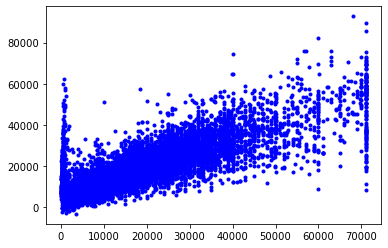

In [28]:
plt.plot(y_test, cbr.predict(X_test), 'b.')